Text(0.5, 1.0, '테스트')

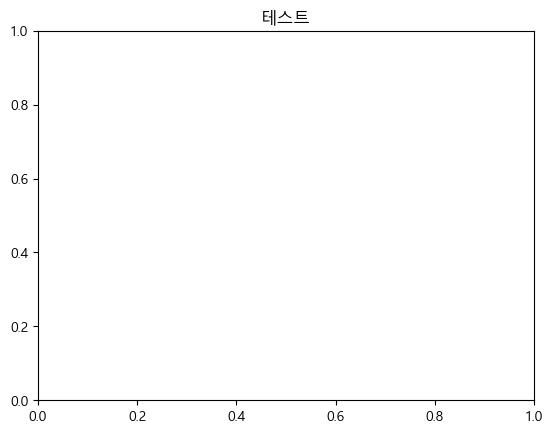

In [37]:
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import FinanceDataReader as fdr

from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager
plt.style.use('default')
f_path = "C:/windows/Fonts/malgun.ttf"
ko_font = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')
plt.title('테스트')

In [38]:
# Data Load
kr_sec = pd.read_csv('./kr_sec_150.csv', index_col = 0)
ov_sec = pd.read_csv('./overseas_sector.csv', index_col = 0)
kr_price = pd.read_csv('./kr_price_150.csv', index_col = 0)
ov_price = pd.read_csv('./ov_price_150.csv', index_col = 0)

In [39]:
kr_sec

,종목명,sector
7,BGF리테일,자유소비재
14,CJ,금융
19,CJ대한통운,산업재
23,CJ제일제당,필수소비재
38,DB손해보험,금융
...,...,...
2682,현대차,산업재
2690,현대해상,금융
2698,호텔신라,자유소비재
2720,효성중공업,정보기술


In [40]:
ov_sec

,trd_dt,tck_iem_cd,gts_iem_ong_pr,gts_iem_hi_pr,gts_iem_low_pr,gts_iem_end_pr,gts_acl_trd_qty,gts_sll_cns_sum_qty,gts_byn_cns_sum_qty,isin_cd,fc_sec_krl_nm,fc_sec_eng_nm,Sector
0,20230103,NVDA,148.5100,149.9600,140.9600,143.1500,40127658.0,0.0,0.0,NaN,NaN,NaN,Technology
1,20230103,APLT,0.7535,0.7900,0.7308,0.7522,63714.0,19658.0,44056.0,NaN,NaN,NaN,Healthcare
2,20230103,ANY,1.8900,2.0293,1.8354,1.9600,24896.4,0.0,0.0,NaN,NaN,NaN,Technology
3,20230103,CLRB,1.6600,1.7200,1.6300,1.6300,21212.0,16444.0,4768.0,NaN,NaN,NaN,Healthcare
4,20230103,NYMTM,18.4300,18.7400,18.4300,18.7000,8061.0,0.0,0.0,NaN,NaN,NaN,Real Estate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455333,20230830,BLZE,5.9900,6.1290,5.8300,5.8600,443470.0,205162.0,238308.0,NaN,NaN,NaN,Technology
455334,20230830,ELDN,1.4800,1.5794,1.4100,1.4900,13462.0,5492.0,7970.0,NaN,NaN,NaN,Healthcare
455335,20230830,BMBL,15.9000,16.4400,15.7900,16.3200,1030250.0,576506.0,453744.0,NaN,NaN,NaN,Technology
455336,20230830,PLRX,16.7900,16.7900,16.2250,16.7100,319531.0,138554.0,180977.0,NaN,NaN,NaN,Healthcare


In [41]:
ov_price

,NVDA,WBA,MNST,AXON,TMUS,TTWO,CINF,PFG,ICLR,COST,...,ENTG,ISRG,ILMN,CSX,STX,ZM,GMAB,XEL,RPRX,WTW
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,143.15,37.19,50.660,168.24,139.04,103.11,104.01,83.77,193.59,453.28,...,64.13,265.63,200.87,30.88,51.880,66.66,43.03,70.07,39.40,245.18
2023-01-04,147.49,37.49,51.075,168.76,139.96,106.77,106.35,85.01,199.35,456.56,...,67.28,270.00,202.61,31.28,52.490,67.65,42.51,70.67,39.15,246.49
2023-01-05,142.65,35.19,50.190,165.74,144.48,105.96,106.67,84.39,199.11,450.19,...,66.71,268.62,201.15,30.91,53.490,65.62,42.12,69.24,38.64,246.44
2023-01-06,148.59,36.61,51.215,170.90,148.57,104.75,109.74,87.46,200.45,482.87,...,70.33,270.39,201.87,32.20,55.910,69.51,42.89,71.29,38.09,253.43
2023-01-07,148.59,36.61,51.215,170.90,148.57,104.75,109.74,87.46,200.45,482.87,...,70.33,270.39,201.87,32.20,55.910,69.51,42.89,71.29,38.09,253.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-26,460.18,25.26,57.340,198.43,133.35,141.42,104.22,76.33,256.32,534.01,...,96.48,297.55,158.08,30.91,64.420,67.70,37.43,57.58,30.21,205.60
2023-08-27,460.18,25.26,57.340,198.43,133.35,141.42,104.22,76.33,256.32,534.01,...,96.48,297.55,158.08,30.91,64.420,67.70,37.43,57.58,30.21,205.60
2023-08-28,468.35,25.17,57.710,200.71,135.18,140.80,104.42,76.31,255.30,536.19,...,97.16,301.48,158.20,30.86,66.065,67.57,38.27,57.85,30.39,206.50


In [42]:
# ov_price 데이터프레임의 주식 코드들을 리스트로 추출
stock_codes = ov_price.columns.tolist()

# ov_sec에서 주식 코드가 stock_codes 리스트에 있는 행만 남기기
ov_sec = ov_sec[ov_sec['tck_iem_cd'].isin(stock_codes)]

# 필요한 열만 남기기 (tck_iem_cd와 Sector 열만 남김)
ov_sec = ov_sec[['tck_iem_cd', 'Sector']]


In [43]:
ov_sec.rename(columns={'Sector': 'sector'}, inplace=True)

In [44]:
kr_sec['sector'].unique().tolist()


['자유소비재', '금융', '산업재', '필수소비재', '정보기술', '헬스케어', '소재', '커뮤니케이션서비스', '유틸리티']

In [45]:
ov_sec

,tck_iem_cd,sector
0,NVDA,Technology
16,WBA,Healthcare
27,MNST,Consumer Defensive
67,AXON,Industrials
80,TMUS,Communication Services
...,...,...
455268,UAL,Industrials
455309,DDOG,Technology
455310,CHKP,Technology
455315,GRAB,Technology


In [46]:
# Sector별 종목명 추출
#국내
col_kr = kr_price.columns.to_list()

자유소비재_kr = kr_sec[kr_sec['sector']=='자유소비재']['종목명'].to_list()
col_자유_kr = [x for x in 자유소비재_kr if x in col_kr]

소재_kr = kr_sec[kr_sec['sector']=='소재']['종목명'].to_list()
col_소재_kr = [x for x in 소재_kr if x in col_kr]

필수소비재_kr = kr_sec[kr_sec['sector']=='필수소비재']['종목명'].to_list()
col_필수_kr = [x for x in 필수소비재_kr if x in col_kr]

정보기술_kr = kr_sec[kr_sec['sector']=='정보기술']['종목명'].to_list()
col_정보_kr = [x for x in 정보기술_kr if x in col_kr]

커뮤니케이션서비스_kr = kr_sec[kr_sec['sector']=='커뮤니케이션서비스']['종목명'].to_list()
col_커뮤_kr = [x for x in 커뮤니케이션서비스_kr if x in col_kr]

금융_kr = kr_sec[kr_sec['sector']=='금융']['종목명'].to_list()
col_금융_kr = [x for x in 금융_kr if x in col_kr]

유틸리티_kr = kr_sec[kr_sec['sector']=='유틸리티']['종목명'].to_list()
col_유틸_kr = [x for x in 유틸리티_kr if x in col_kr]

산업재_kr = kr_sec[kr_sec['sector']=='산업재']['종목명'].to_list()
col_산업_kr = [x for x in 산업재_kr if x in col_kr]

에너지_kr = kr_sec[kr_sec['sector']=='에너지']['종목명'].to_list()
col_에너지_kr = [x for x in 에너지_kr if x in col_kr]

헬스케어_kr = kr_sec[kr_sec['sector']=='헬스케어']['종목명'].to_list()
col_헬스_kr = [x for x in 헬스케어_kr if x in col_kr]

#해외
col_ov = ov_price.columns.to_list()

자유소비재_ov = ov_sec[ov_sec['sector']=='Consumer Defensive']['tck_iem_cd'].to_list()
col_자유_ov = [x for x in 자유소비재_ov if x in col_ov]

소재_ov = ov_sec[ov_sec['sector']=='Basic Materials']['tck_iem_cd'].to_list()
col_소재_ov = [x for x in 소재_ov if x in col_ov]

필수소비재_ov = ov_sec[ov_sec['sector']=='Consumer Defensive']['tck_iem_cd'].to_list()
col_필수_ov = [x for x in 필수소비재_ov if x in col_ov]

정보기술_ov = ov_sec[ov_sec['sector']=='Technology']['tck_iem_cd'].to_list()
col_정보_ov = [x for x in 정보기술_ov if x in col_ov]

커뮤니케이션서비스_ov = ov_sec[ov_sec['sector']=='Communication Services']['tck_iem_cd'].to_list()
col_커뮤_ov = [x for x in 커뮤니케이션서비스_ov if x in col_ov]

금융_ov = ov_sec[ov_sec['sector']=='Financial Services']['tck_iem_cd'].to_list()
col_금융_ov = [x for x in 금융_ov if x in col_ov]

유틸리티_ov = ov_sec[ov_sec['sector']=='Utilities']['tck_iem_cd'].to_list()
col_유틸_ov = [x for x in 유틸리티_ov if x in col_ov]

산업재_ov = ov_sec[ov_sec['sector']=='Industrials']['tck_iem_cd'].to_list()
col_산업_ov = [x for x in 산업재_ov if x in col_ov]

에너지_ov = ov_sec[ov_sec['sector']=='Energy']['tck_iem_cd'].to_list()
col_에너지_ov = [x for x in 에너지_ov if x in col_ov]

헬스케어_ov = ov_sec[ov_sec['sector']=='Healthcare']['tck_iem_cd'].to_list()
col_헬스_ov = [x for x in 헬스케어_ov if x in col_ov]

In [47]:
stock = pd.merge(kr_price, ov_price, how = 'left', left_index=True, right_index=True)

### 상관행렬 생성

- 임계값 +-0.7 이하의 엣지는 제거

In [48]:
#상관행렬 생성
stock_cor = stock.dropna(axis = 1).corr(method = 'pearson')

# convert matrix to list of edges and rename the columns
edges = stock_cor.stack().reset_index()
edges.columns = ["종목_1", "종목_2", "correlation"]

# remove self correlations
edges = edges.loc[edges["종목_1"] != edges["종목_2"]].copy()

# 임계값(+-0.7) 이하 제거
threshold = 0.7

# 기본 무방향 그래프 생성
Gx = nx.from_pandas_edgelist(edges, "종목_1", "종목_2", edge_attr=["correlation"])

# list to store edges to remove
remove = []
# loop through edges in Gx and find correlations which are below the threshold
for 종목_1, 종목_2 in Gx.edges():
    corr = Gx[종목_1][종목_2]["correlation"]
    # add to remove node list if abs(corr) < threshold
    if abs(corr) < threshold:
        remove.append((종목_1, 종목_2))

# remove edges contained in the remove list
Gx.remove_edges_from(remove)

print(str(len(remove)) + " edges removed")

35446 edges removed


In [49]:
# 국내인지 해외인지 속성 부여하기
korea = kr_price.columns.to_list()
nasdaq = ov_price.columns.to_list()

#노드 사이즈가 너무 차이가 많이 나서 여기서는 제외
degree_dict = dict(nx.degree(Gx))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx.add_node(stock_list[i], size = nsize[i]*.1)

In [50]:
Gx.add_nodes_from(korea, shape = 'star')
Gx.add_nodes_from(nasdaq, shape = 'dot')

Gx.add_nodes_from(col_자유_kr, group = 1)
#Gx.add_nodes_from(col_소재_kr, group = 2)
#Gx.add_nodes_from(col_필수_kr, group = 3)
#Gx.add_nodes_from(col_정보_kr, group = 4)
#Gx.add_nodes_from(col_커뮤_kr, group = 5)
#Gx.add_nodes_from(col_금융_kr, group = 6)
#Gx.add_nodes_from(col_유틸_kr, group = 7)
#Gx.add_nodes_from(col_산업_kr, group = 8)
#Gx.add_nodes_from(col_에너지_kr, group = 9)
#Gx.add_nodes_from(col_헬스_kr, group = 10)

Gx.add_nodes_from(col_자유_ov, group = 1)
#Gx.add_nodes_from(col_소재_ov, group = 2)
#Gx.add_nodes_from(col_필수_ov, group = 3)
#Gx.add_nodes_from(col_정보_ov, group = 4)
#Gx.add_nodes_from(col_커뮤_ov, group = 5)
#Gx.add_nodes_from(col_금융_ov, group = 6)
#Gx.add_nodes_from(col_유틸_ov, group = 7)
#Gx.add_nodes_from(col_산업_ov, group = 8)
#Gx.add_nodes_from(col_에너지_ov, group = 9)
#Gx.add_nodes_from(col_헬스_ov, group = 10)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.from_nx(Gx)
net.show('All_Sector.html')

All_Sector.html
